In [ ]:

import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import random

from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats as ss

import numba


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
daf = pd.read_excel('/content/drive/MyDrive/matstat/tab.xlsx')


In [ ]:
noise = pd.read_excel('/content/drive/MyDrive/matstat/tab.xlsx', sheet_name = 'Noise')

In [ ]:
noise = noise

In [ ]:
daf = daf.drop(columns = 'Unnamed: 0')

noise = noise.drop(columns='Unnamed: 0')
noise 

,noise_sample
0,32.040149
1,7.445324
2,8.468399
3,1.939507
4,11.838395
...,...
5995,38.913674
5996,8.681485
5997,4.897558
5998,8.241925


In [ ]:
daf = daf.main_sample
daf = np.array(daf)

In [ ]:
def draw_density(arr, tr=0,x=None, real_density = 1, number_bins = 100):

    plt.hist(arr, density=True, bins=number_bins, color = "green")
    
    
    #print('Substance between area under density curve and hist should goes to zero with bigger n. Now it is: {0}'.format(find_dist_normal(values, bins, real_density,step)))
    #print('And of course Kolmogorov-smirnov test: {0}'.format (ss.kstest(arr, 'norm', args = (0,1))))
    if tr:
      plt.plot(x, real_density, color = "red")
      plt.legend(["Real density", "Sample density"])
    else:
      
      plt.legend(["Sample density"])

    plt.show()

In [ ]:

def draw_ecdf(arr, tr=0, x = None, real_ecdf=None):
    x = np.arange(np.min(arr)-5,np.max(arr)+5,0.01)
    result_ecdf = ECDF(arr)(x)
    plt.plot(x, result_ecdf, color = "green")
    if tr:
      plt.plot(x, real_ecdf, color = "red")
      plt.legend(["Sample ecdf", "Real ecdf"])
    else:
      plt.legend(["Sample ecdf"])

    plt.show()


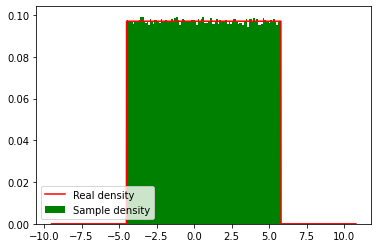

In [ ]:
params = [-4.5,10.3]
x = np.arange(np.min(daf)-5,np.max(daf)+5,0.01)
draw_density(daf,tr = 1, x=x,real_density = ss.uniform.pdf(x,*params))



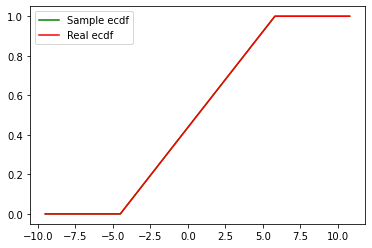

In [ ]:
draw_ecdf(daf,tr = 1,x=x,real_ecdf = ss.uniform.cdf(x,*params))

ОММ

In [ ]:

def first_moment(num):
  return np.mean(num)

def second_moment(num):
  return np.mean(np.power(num,2))

In [ ]:
m1 = first_moment(np.array(daf))
m2 = second_moment(np.array(daf))

In [ ]:

def OMM(num):
  m1 = first_moment(num)
  m2 = second_moment(num)
  b = m1 + np.sqrt(3*(m2-m1**2))
  a = 2*m1 - b
  return a,b



In [ ]:
OMM(daf)

(-4.503437431105757, 5.795866378275404)

In [ ]:

def OMP (num):
  return np.min(num), np.max(num)

In [ ]:
par_omp = OMP(daf)
print(par_omp)


(-4.499984445042863, 5.799989761408375)


In [ ]:
def check_solve(num,f,my_est_a,my_est_b=5, need = 0):
    leng = len(num)
    arr = []
    cur_est_a = []
    cur_est_b = []
    for i in range(0,leng):
      arr.append(num[i])
      a,b =  f(arr)
      cur_est_a.append(a)
      cur_est_b.append(b)
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    if need: return cur_est_a. cur_est_b
    axs[0].plot(cur_est_a)
    axs[0].axhline(y=my_est_a)
    axs[1].plot(cur_est_b)
    axs[1].axhline(y=my_est_b)

# @numba.njit(parallel =True, fastmath= True)
# def build_mas (num,f,my_est_a,my_est_b=5):
#     leng = len(num)
#     arr = np.empty(leng)
#     cur_est_a = np.empty(leng)
#     cur_est_b = np.empty(leng)
#     for i in range(0,leng):
#       arr[i] = num[i] 
#       a,b =  f(arr)
#       cur_est_a[i] = a
#       cur_est_b[i] = b
#     return cur_est_a, cur_est_b 



# def check_solve(num,f,my_est_a,my_est_b=5):
#     cur_est_a, cur_est_b = build_mas(num,f,my_est_a,my_est_b=5)
#     fig, axs = plt.subplots(1, 2, figsize=(20, 10))
#     axs[0].plot(cur_est_a,'ro')
#     axs[0].axhline(y=my_est_a)
#     axs[1].plot(cur_est_b,'ro')
#     axs[1].axhline(y=my_est_b)

In [ ]:
my_est = [-4.5,5.8]

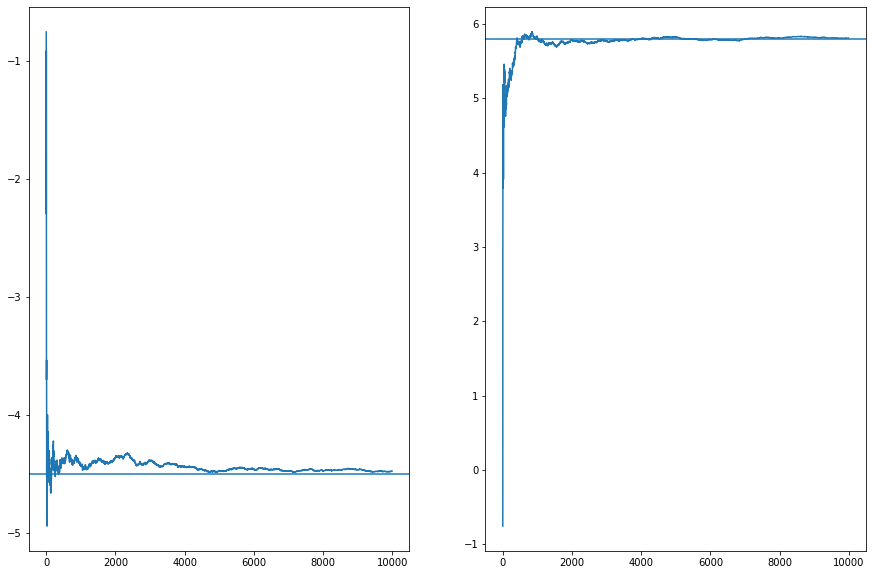

In [ ]:
check_solve(daf[:10000],OMM,-4.5,5.8)

In [ ]:
OMM(daf)[0]

-4.503437431105757

In [ ]:
daf[100:200]

array([-2.2016622 , -4.48259087,  4.60716712,  1.0548778 , -3.58115652,
        1.87802399,  4.23859717,  3.50716568,  3.65280508,  5.75879849,
       -1.71534031,  1.74881139, -4.16171399,  0.43594906,  0.28592839,
       -3.60062977, -2.54739584,  5.23582806, -2.01166735, -2.35676701,
        4.22178707,  0.52743468,  0.88252693, -0.89399369, -2.21384886,
       -4.12111896,  0.3640934 , -4.03250172,  1.34313424,  4.98020501,
       -3.29472761,  2.30251211,  1.04072328, -1.67994721,  5.20587402,
       -2.62035417,  0.04712896,  2.36499546,  0.95520251,  2.93820358,
        4.16732413,  1.93710173, -1.02596002,  0.98587757,  5.60750809,
        1.70603237, -0.89266261, -4.06753314, -1.80053328,  0.5528929 ,
        3.62630592, -2.05943057,  4.62514754,  0.82561338,  3.81467134,
        0.48461273,  0.31693373,  3.16541905, -3.20241503, -0.05888048,
        2.77677606,  0.92071418,  0.4774672 ,  4.23979431,  5.3027759 ,
        2.70737105,  0.47494141, -1.94377835, -3.04308494,  0.26

In [ ]:
def average_error(f, num,k,expected):
    nums = []
    l = len(num)
    for i in range(100,l,1000):
        sum = 0
        r=0
        for j in range(0,l-i,i):
            sum+= abs(f(num[j:j+i])[k]-expected)
            r+=1
        nums.append(sum/(r))
        #print(nums)
    x = np.arange(0,1000000,0.5)
    plt.plot(nums)
    plt.xlim(0,100)
    plt.plot(x,0.1/x**0.5)
    plt.legend(['погрешность','0.1/x^0.5'])
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


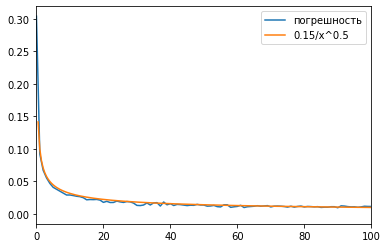

In [ ]:

average_error(OMM,daf,k=0,expected = -4.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


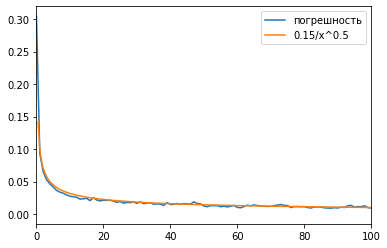

In [ ]:
average_error(OMM,daf,k=1,expected = 5.8)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


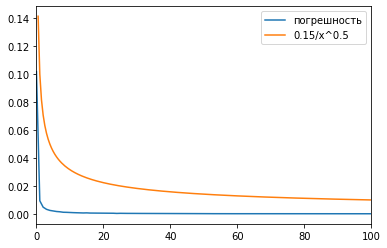

In [ ]:
average_error(OMP,daf,k=0,expected = -4.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


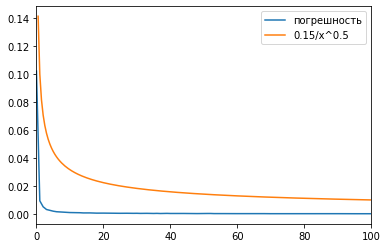

In [ ]:
average_error(OMP,daf,k=1,expected = 5.8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


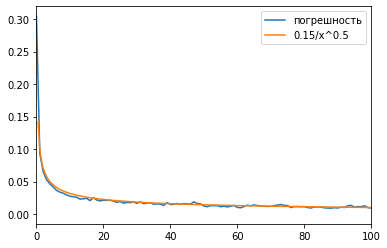

In [ ]:
average_error(OMM,daf,k=1,expected = 5.8)

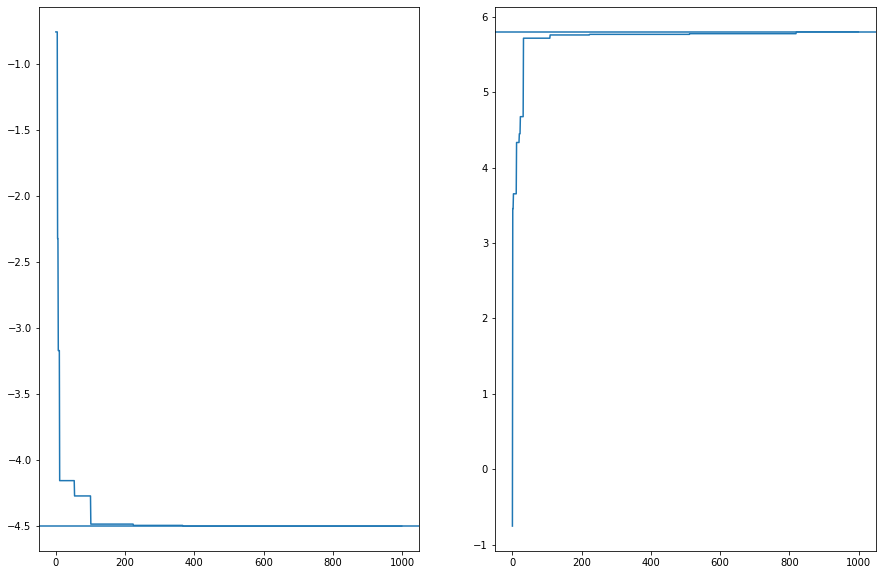

In [ ]:
check_solve(daf[:1000],OMP,-4.5,5.8)

In [ ]:

def check_asymptotic_norm(num,f,my_est_a,my_est_b,check = 1):
    n = len(num)
    #if n<=200: raise 'Выборка чуть меньше среднего'
    l = n*3
    cur_est_a = np.empty(l)
    cur_est_b = np.empty(l)
    
    k = n//10
    sqrt_value =  k** 0.5
    for i in range(l):
      estimate = f(np.random.choice(num,k))
      cur_est_a[i] = sqrt_value*(estimate[0] - my_est_a)
      cur_est_b[i] = sqrt_value*(estimate[1] - my_est_b)
    params = ss.norm.fit(cur_est_a)
    
    d1 = params[1]
    if check:
      print(params)
      x = np.arange(np.min(cur_est_a),np.max(cur_est_a))
      p = ss.norm.pdf(x,*params)
      draw_density(cur_est_a,x=x, tr=1,real_density=p)
    params = ss.norm.fit(cur_est_b)
    
    d2 = params[1]
    if check:
      print(params)
      x = np.arange(np.min(cur_est_b),np.max(cur_est_b))
      p = ss.norm.pdf(x,*params)
      draw_density(cur_est_b,x=x, tr=1,real_density=p)
    else:
      return d1,d2
    # fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    # axs[0].hist(cur_est_a,density = True, bins = 100)
    # params = ss.norm.fit(cur_est_a)
    # x = np.linspace(np.min(cur_est_a),)
    # ax[0].hist
    # axs[1].hist(cur_est_b,density = True,bins = 100)

(1.2015299220966702, 3.760146552585503)


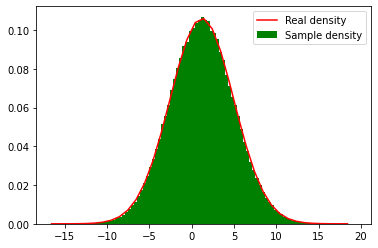

(0.12418495907876086, 3.7587470067254407)


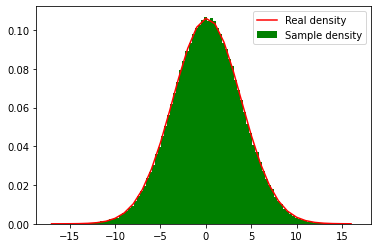

In [ ]:
check_asymptotic_norm(daf[:100000],OMM,-4.5,5.8)

Оценка максимального правдоподобия $\theta^*$ не будет ассимптотичеки нормальна, так как
для любой выборки с оценкой $\theta$:   

 $
 \theta^* - \theta >= 0
 $

(1.0258240266078253, 1.1207094928051302)


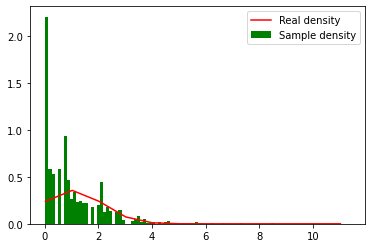

(-0.9864828983338176, 0.9605796057605153)


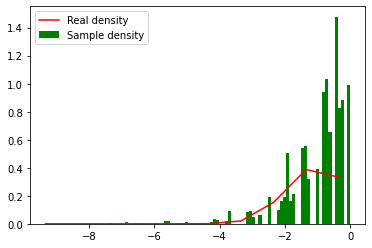

In [ ]:
check_asymptotic_norm(daf[:1000],OMP,-4.5,5.8)

In [ ]:
def conf_int (num, eps):
  a,b = OMM(num)
  
  d_a,d_b = check_asymptotic_norm(num,OMM,-4.5,5.8,0)
  q = ss.norm.ppf(1-eps/2)
  l =  len(num)
  a_min = a -(q * (d_a)**0.5)/(l**0.5)
  a_max= a + (q * (d_a)**0.5)/(l**0.5)
  b_min = b -(q * (d_b)**0.5)/(l**0.5)
  b_max= b + (q * (d_b)**0.5)/(l**0.5)
  return a_min,a_max,b_min,b_max


In [ ]:
conf_int(daf[:10000],0.95)

(-4.473598668207102, -4.471166194819632, 5.806342529619206, 5.808776779162978)

In [ ]:
conf_int(daf[:10000],0.9)

(-4.474826212623286,
 -4.4699386504034475,
 5.805123223702864,
 5.8099960850793195)

In [ ]:
def draw_conf(num,eps):
  l  = len(num)
  a1 = []
  a2 =[]
  b1 = []
  b2= []

  for i in range(0,l,10):
    a_min,a_max,b_min,b_max = conf_int(daf[:i],eps)
    a1.append(a_min)
    a2.append(a_max)
    b1.append(b_min)
    b2.append(b_max)
  fig, axs = plt.subplots(1, 2, figsize=(20, 10))
  axs[0].plot(a1)
  axs[0].plot(a2)
  axs[1].plot(b1)
  axs[1].plot(b2)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:291: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:296: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


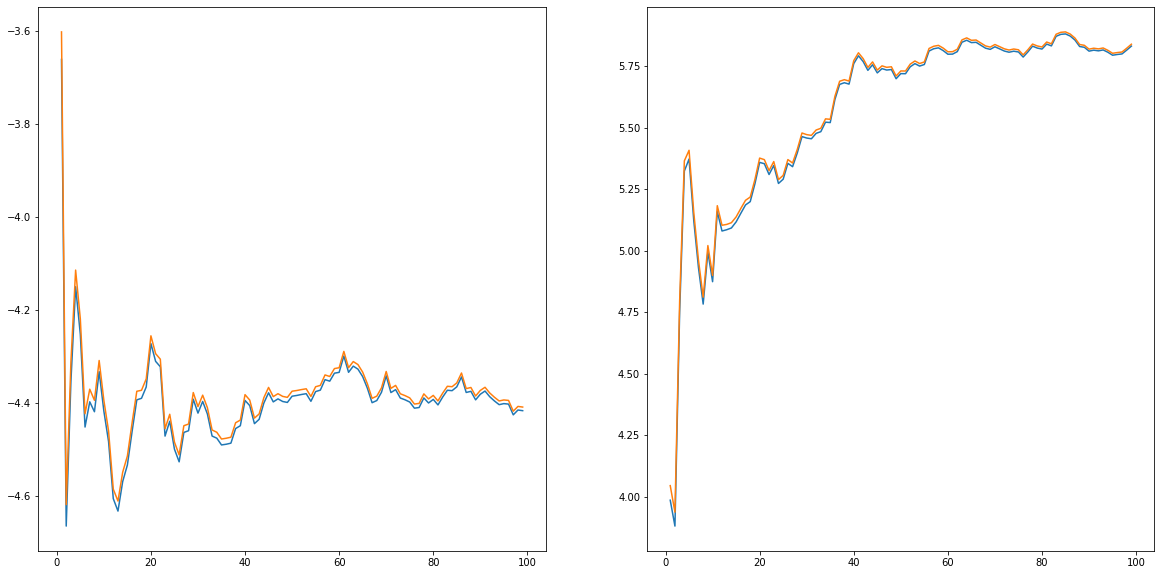

In [ ]:
draw_conf(daf[:1000],0.95)

In [ ]:
ss.kstest(daf,lambda x: ss.uniform.cdf(x, par_omp[0],par_omp[1]- par_omp[0]))

KstestResult(statistic=0.0010032932371362158, pvalue=0.26648621837312686)

Так нельзя делать, так как у нас неизвестные параметры (сложная гипотеза)

In [ ]:
new_daf = pd.DataFrame(np.append(daf, noise.to_numpy()), columns=['new'])

In [ ]:
new_daf = new_daf.new

In [ ]:
new_daf=new_daf.sample(frac=1).reset_index(drop=True)

In [ ]:
new_daf  = np.array(new_daf)

In [ ]:
new_daf


array([-2.40200674,  4.3072336 , -4.42370338, ..., -3.60763951,
       -0.25088704, -3.39029002])

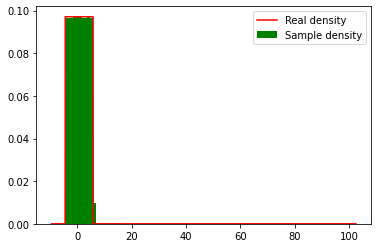

In [ ]:
params = [-4.5,10.3]
x = np.arange(np.min(new_daf)-5,np.max(new_daf)+5,0.01)
draw_density(new_daf,tr = 1, x=x,real_density = ss.uniform.pdf(x,*params))

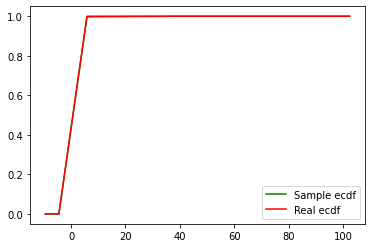

In [ ]:
draw_ecdf(new_daf,tr = 1,x=x,real_ecdf = ss.uniform.cdf(x,*params))

In [ ]:
OMM(new_daf)

(-4.850920556456351, 6.266821646821091)

In [ ]:
par1_omp =OMP(new_daf)

Шум в 97 конечно все портит

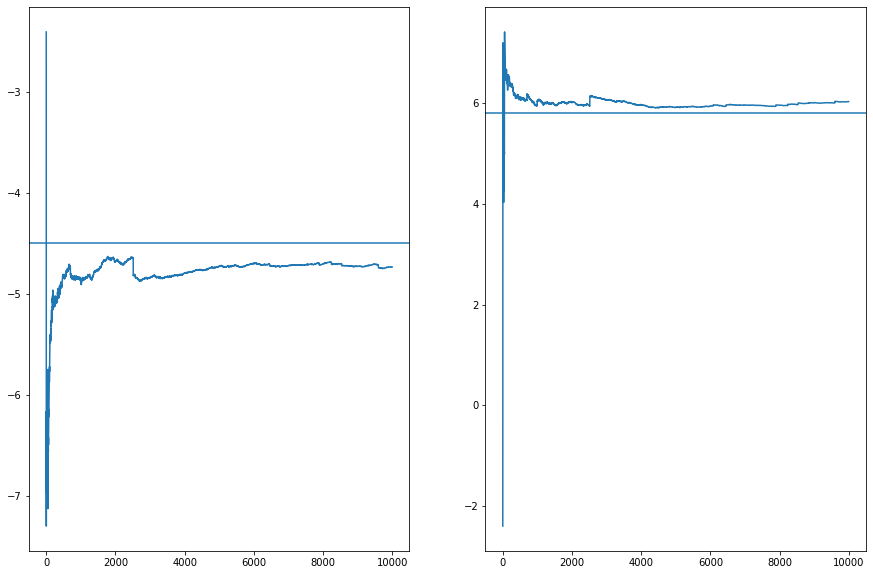

In [ ]:
check_solve(new_daf[:10000],OMM,-4.5,5.8)

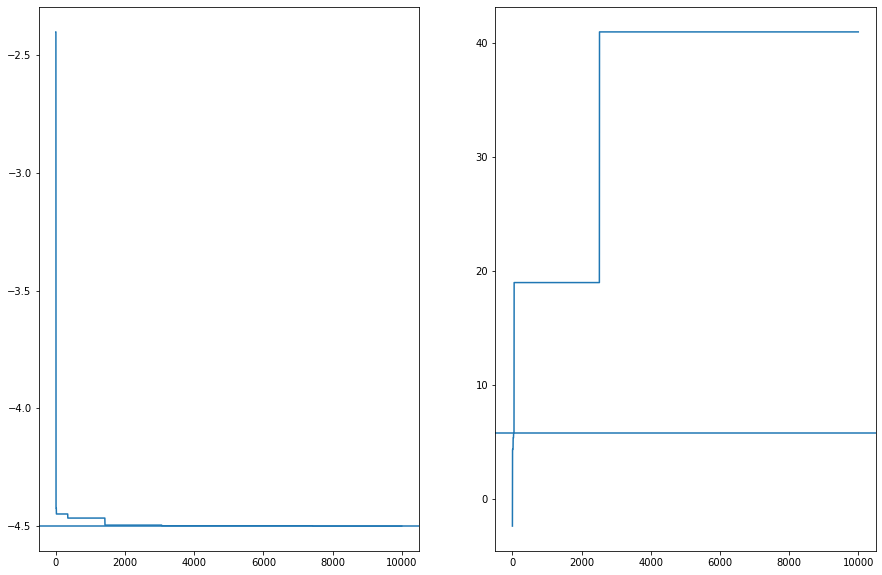

In [ ]:


check_solve(new_daf[:10000],OMP,-4.5,5.8)

(1.21181865009284, 3.762999252514574)


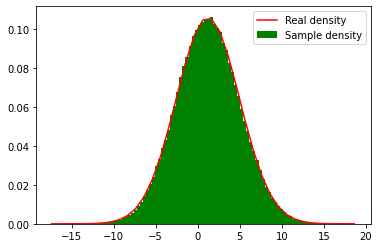

(0.13777090365325778, 3.7596949709638645)


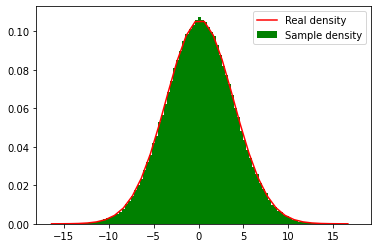

In [ ]:
check_asymptotic_norm(daf[:100000],OMM,-4.5,5.8)

In [ ]:
conf_int(new_daf[:10000],0.95)

(-4.7355396471876805, -4.732329155585857, 6.029323429555256, 6.032847709891846)

In [ ]:
ss.kstest(new_daf,lambda x: ss.uniform.cdf(x, par1_omp[0],par1_omp[1]-par1_omp[0]))

KstestResult(statistic=0.895682120097978, pvalue=0.0)

тут нельзя делать по той же причине и еще выборка с шумом...